In [2]:
import time

import numpy as np
%load_ext autoreload
%autoreload 2

In [12]:
from components.logs.Logger import get_logger

logger = get_logger(__name__)

In [14]:
import pandas as pd

df = pd.read_feather("/home/astosi/PycharmProjects/graph_embeddings/data/houses/v1.feather")

In [3]:
df.head()

In [2]:
unique_values = df['x'].unique()

# create a boolean mask of non-duplicate rows
mask = ~df.duplicated(subset='x', keep=False)

# filter the dataframe using the mask
df = df[mask]

In [23]:
from gsn.components.prepare_data import get_house_geopandas_with_df

houses = get_house_geopandas_with_df(df)

### Generate and save graphs

### Setup Hyperparameters

In [1]:
from enums.Hyperparameters import Hyperparameters

hparams = Hyperparameters(
                        p = 0.6,
                        q = 0.4,
                        num_walks = 5,
                        num_steps = 5,
                        num_negative_samples = 4,
                       # batch_size = 1024,
                        batch_size = 1024,
                        learning_rate = 0.001,
                        embedding_dim = 1,
                        num_epochs= 50)

### Run

In [6]:
from enums.Category import Category
from components.prepare_data import get_pois

poi = get_pois('Utrecht', Category.HEALTHCARE)

In [10]:
df = df.reset_index().rename(columns={'index': 'ID'})
df['ID'] = 'H' + df['ID'].astype(str)

NameError: name 'df' is not defined

In [17]:
df = df.drop(columns = 'ID')

In [21]:
df = df.iloc[:100]

NameError: name 'df' is not defined

In [22]:
from components.embedding_generator import generate_embeddings

new_df = df.apply(lambda row:
                  generate_embeddings(
                                       house_id = row.ID,
                                       x = row.x,
                                       y = row.y,
                                       address = row.address,
                                       province = row.province,
                                       category = Category.HEALTHCARE,
                                       hparams= hparams), axis =1
                                   )

2023-03-14 16:49:21 - INFO - Generating embeddings for H0 in Utrecht for category: healthcare
2023-03-14 16:49:21 - INFO - Fetching geolocation and points of interest for H0 in Utrecht
2023-03-14 16:49:21 - INFO - Checking for existing POI graph at /home/astosi/UH/GraphThings/gsn/data/pois_graphs/Utrecht/healthcare_4km.edgelist...
2023-03-14 16:49:21 - INFO - Loaded POI graph for healthcare in Utrecht with 258 nodes and 4376 edges.
2023-03-14 16:49:21 - INFO - Checking for pre-existing embedding for H0
2023-03-14 16:49:21 - INFO - H0 already has an embedding. Setting and skipping...
2023-03-14 16:49:21 - INFO - Generating embeddings for H1 in Utrecht for category: healthcare
2023-03-14 16:49:21 - INFO - Fetching geolocation and points of interest for H1 in Utrecht
2023-03-14 16:49:21 - INFO - Checking for existing POI graph at /home/astosi/UH/GraphThings/gsn/data/pois_graphs/Utrecht/healthcare_4km.edgelist...
2023-03-14 16:49:21 - INFO - Loaded POI graph for healthcare in Utrecht with 

In [8]:
new_df

NameError: name 'new_df' is not defined

In [14]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Assuming your dataframe is named df
embeddings = np.array(new_df['embeddings_healthcare'].tolist())

# Apply PCA to reduce dimensionality to 1
pca = PCA(n_components=1)
embeddings_pca = pca.fit_transform(embeddings)

# Update the dataframe with the PCA values
new_df['embeddings_healthcare_pca'] = embeddings_pca

In [123]:
new_df

,embeddings_healthcare,embeddings_healthcare_d1,embeddings_healthcare_d2,embeddings_healthcare_d3,embeddings_healthcare_pca
0,"[-0.31809622, -0.23268591, -0.08859759]",-0.318096,-0.232686,-0.088598,-0.088646
1,"[-0.30213517, -0.71653503, 0.8509801]",-0.302135,-0.716535,0.850980,-0.842499
2,"[0.027596815, -0.9184796, 0.206634]",0.027597,-0.918480,0.206634,-0.905903
3,"[-0.1581075, 0.38654107, 0.016160518]",-0.158108,0.386541,0.016161,0.372585
4,"[0.46020788, 0.13241968, -0.13410315]",0.460208,0.132420,-0.134103,0.002709
5,"[-0.4508495, 0.015265782, -0.5531899]",-0.450850,0.015266,-0.553190,0.331464
6,"[-0.3380161, -0.71262276, -0.3891236]",-0.338016,-0.712623,-0.389124,-0.404306
7,"[-1.1270736, 0.89511734, -0.09843027]",-1.127074,0.895117,-0.098430,1.169338
8,"[-0.5876514, -1.0194292, 0.46166715]",-0.587651,-1.019429,0.461667,-0.886881
9,"[0.27107376, 0.68984723, 0.4754248]",0.271074,0.689847,0.475425,0.347827


In [24]:
final_df = pd.concat([df.reset_index(drop=True), new_df.reset_index(drop=True)], axis=1)

In [25]:
final_df.to_csv('one_d_100_emdgs.csv', index=False)

In [17]:
query_house_id = 'H0'

In [18]:
from gsn.components.similarity import find_similar_houses

similarity_results = find_similar_houses(final_df, query_house_id, 3)
similarity_results

SimilarHouses(query_house_id='H0', similar_house_ids=['H35', 'H6', 'H34'], similarity_scores=[0.9431940317153931, 0.7803572416305542, 0.7245126962661743])

In [19]:
from gsn.components.similarity import create_map

create_map(similarity_results, final_df)

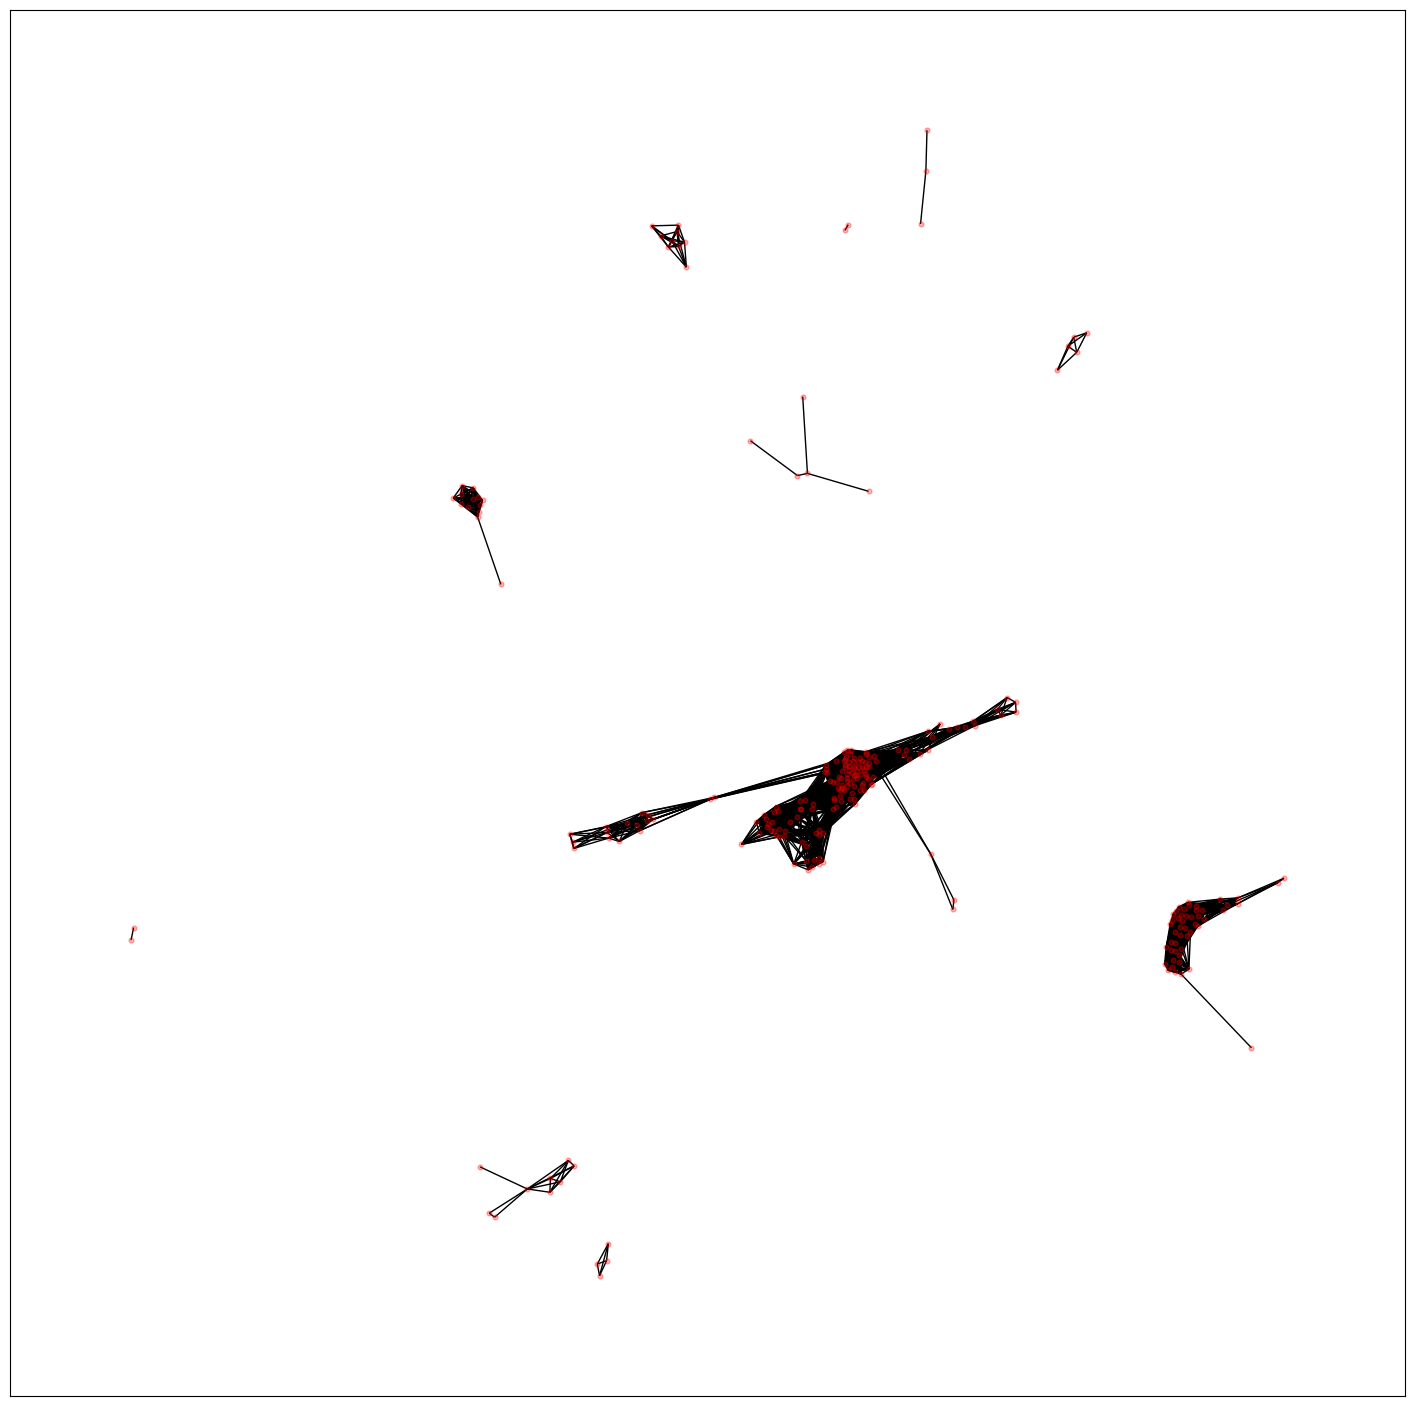

In [115]:
path = "/home/astosi/UH/GraphThings/gsn/data/houses/graphs/healthcare/H15_4km.edgelist"
import networkx as nx

g = nx.read_weighted_edgelist(path)
plot_graph(g)


In [89]:
path = "/home/astosi/UH/GraphThings/gsn/data/pois_graphs/Utrecht/healthcare_4km.edgelist"
import networkx as nx

g = nx.read_weighted_edgelist(path)

#plot_graph(g)


NodeView(('P0', 'P2', 'P3', 'P4', 'P5', 'P6', 'P1', 'P8', 'P9', 'P7', 'P13', 'P14', 'P30', 'P10', 'P11', 'P12', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P29', 'P27', 'P32', 'P33', 'P34', 'P36', 'P40', 'P44', 'P45', 'P51', 'P54', 'P35', 'P58', 'P59', 'P28', 'P37', 'P53', 'P55', 'P56', 'P57', 'P41', 'P31', 'P69', 'P63', 'P65', 'P66', 'P67', 'P74', 'P78', 'P79', 'P80', 'P85', 'P87', 'P83', 'P84', 'P86', 'P89', 'P91', 'P92', 'P93', 'P94', 'P88', 'P96', 'P101', 'P100', 'P102', 'P107', 'P108', 'P39', 'P42', 'P43', 'P47', 'P48', 'P49', 'P97', 'P103', 'P104', 'P106', 'P118', 'P105', 'P109', 'P110', 'P112', 'P113', 'P114', 'P115', 'P116', 'P117', 'P119', 'P120', 'P122', 'P125', 'P126', 'P127', 'P128', 'P129', 'P130', 'P131', 'P132', 'P133', 'P134', 'P135', 'P136', 'P137', 'P139', 'P140', 'P142', 'P143', 'P145', 'P146', 'P147', 'P148', 'P150', 'P151', 'P152', 'P154', 'P155', 'P123', 'P124', 'P138', 'P141', 'P153', 'P156', 'P38', 'P46', 'P50', 'P60', 'P